In [2]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib
matplotlib.style.use('fivethirtyeight') 



import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import RidgeCV



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
with open('/Users/NickThomas/Project_Luther/data/Steam_games_dumb_df.pkl', 'rb') as pickle_file:
        Steam_games_dumb_df = pickle.load(pickle_file)

In [4]:
Steam_games_dumb_df.head()

,Game,Price,Owners,dlc_cost,number_of_reviews,user_rating,Release_date,"1,000,000-2,000,000","100,000-200,000","20,000-50,000","200,000-500,000","50,000-100,000","500,000-1,000,000"
0,Friday the 13th: Killer Puzzle,0.00,"100,000 .. 200,000",18.89,1184,95,2018-04-12,0,1,0,0,0,0
1,Radical Heights,0.00,"1,000,000 .. 2,000,000",14.99,7365,57,2018-04-10,1,0,0,0,0,0
2,Farm Manager 2018,19.99,"20,000 .. 50,000",12.95,276,62,2018-04-06,0,0,1,0,0,0
3,Mirror,1.19,"200,000 .. 500,000",2.38,982,96,2018-04-19,0,0,0,1,0,0
4,Minit,9.99,"0 .. 20,000",0.00,221,94,2018-04-03,0,0,0,0,0,0


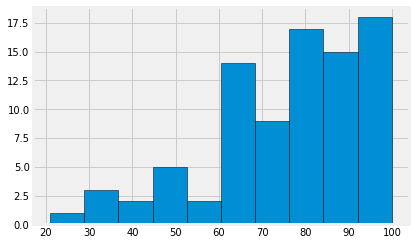

In [5]:
Steam_games_dumb_df.user_rating.hist(edgecolor='black')

In [6]:
Steam_games_dumb_df['Owners'] = Steam_games_dumb_df.Owners.astype('category').cat.codes
Steam_games_dumb_df.assign(Owners=Steam_games_dumb_df.Owners.astype('category').cat.codes).corr()

,Price,Owners,dlc_cost,number_of_reviews,user_rating,"1,000,000-2,000,000","100,000-200,000","20,000-50,000","200,000-500,000","50,000-100,000","500,000-1,000,000"
Price,1.000000,0.061500,0.468623,0.200962,-0.212878,-0.112090,-0.043862,0.075246,-0.133627,-0.011525,0.307666
Owners,0.061500,1.000000,0.176069,0.319046,-0.066984,-0.031370,0.124443,0.340626,0.272970,0.677665,0.274257
dlc_cost,0.468623,0.176069,1.000000,0.231671,-0.147473,0.116966,0.043267,-0.030799,0.151640,0.025576,0.244562
number_of_reviews,0.200962,0.319046,0.231671,1.000000,-0.004958,0.498664,0.186131,-0.102990,0.036121,-0.014293,0.758697
user_rating,-0.212878,-0.066984,-0.147473,-0.004958,1.000000,-0.050305,0.030771,-0.268859,0.038293,0.085734,-0.038372
"1,000,000-2,000,000",-0.112090,-0.031370,0.116966,0.498664,-0.050305,1.000000,-0.055972,-0.059094,-0.029336,-0.052753,-0.016737
"100,000-200,000",-0.043862,0.124443,0.043267,0.186131,0.030771,-0.055972,1.000000,-0.138918,-0.068963,-0.124014,-0.039344
"20,000-50,000",0.075246,0.340626,-0.030799,-0.102990,-0.268859,-0.059094,-0.138918,1.000000,-0.072809,-0.130931,-0.041539
"200,000-500,000",-0.133627,0.272970,0.151640,0.036121,0.038293,-0.029336,-0.068963,-0.072809,1.000000,-0.064998,-0.020621
"50,000-100,000",-0.011525,0.677665,0.025576,-0.014293,0.085734,-0.052753,-0.124014,-0.130931,-0.064998,1.000000,-0.037082


In [7]:
Steam_games_dumb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 98
Data columns (total 13 columns):
Game                   86 non-null object
Price                  86 non-null float64
Owners                 86 non-null int8
dlc_cost               86 non-null float64
number_of_reviews      86 non-null int64
user_rating            86 non-null int64
Release_date           86 non-null datetime64[ns]
1,000,000-2,000,000    86 non-null uint8
100,000-200,000        86 non-null uint8
20,000-50,000          86 non-null uint8
200,000-500,000        86 non-null uint8
50,000-100,000         86 non-null uint8
500,000-1,000,000      86 non-null uint8
dtypes: datetime64[ns](1), float64(2), int64(2), int8(1), object(1), uint8(6)
memory usage: 5.3+ KB


In [8]:
Steam_games_dumb_df['user_rating_log']=np.log(Steam_games_dumb_df.user_rating)

In [9]:
del Steam_games_dumb_df['user_rating_log']

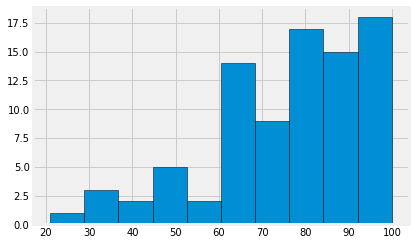

In [12]:
Steam_games_dumb_df.user_rating.hist(edgecolor='black')

In [10]:
Steam_games_dumb_df = Steam_games_dumb_df.drop(['20,000-50,000', '1,000,000-2,000,000', '500,000-1,000,000', '100,000-200,000', '200,000-500,000', '50,000-100,000'], axis=1)

Price               -0.212878
dlc_cost            -0.147473
Owners              -0.066984
number_of_reviews   -0.004958
user_rating          1.000000
Name: user_rating, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

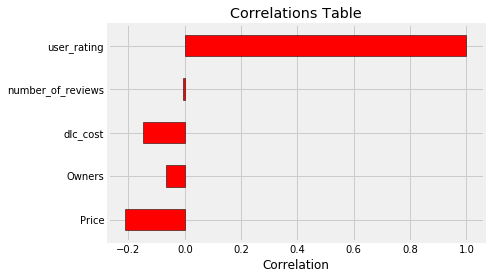

In [11]:
Steam_games_dumb_df.corr()['user_rating'].plot.barh(color='red', edgecolor='black')
print(Steam_games_dumb_df.corr()['user_rating'].sort_values())
plt.xlabel("Correlation")
plt.title("Correlations Table")
plt.show

In [12]:
#Create a test-train split
x_list = ['Price', 'Owners']
X = Steam_games_dumb_df[x_list]
y = Steam_games_dumb_df.user_rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=42


In [13]:
model = Lasso(max_iter=5000)
parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
grid = GridSearchCV(model,parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=1)
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.001, 0.1, 1], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [14]:
grid.cv_results_

{'mean_fit_time': array([0.00198517, 0.00163088, 0.00135241, 0.00138946, 0.00127764,
        0.00160542, 0.00155735, 0.00180478]),
 'std_fit_time': array([9.74051530e-04, 2.78470802e-04, 1.07345523e-04, 2.09960958e-04,
        5.29066675e-05, 2.75625968e-04, 2.43368081e-04, 1.61089072e-04]),
 'mean_score_time': array([0.00060782, 0.00048814, 0.00036154, 0.00040298, 0.00035696,
        0.00046825, 0.00040922, 0.00051885]),
 'std_score_time': array([3.59371500e-04, 1.08463171e-04, 1.85841739e-05, 5.61789053e-05,
        2.08571429e-05, 7.46400196e-05, 5.43637441e-05, 1.03840354e-04]),
 'param_alpha': masked_array(data=[1e-05, 1e-05, 0.001, 0.001, 0.1, 0.1, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, False, True, False, True, False, True, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
    

In [15]:
type(grid.best_estimator_)

sklearn.linear_model.coordinate_descent.Lasso

In [16]:
best_lasso = grid.best_estimator_
lasso_pred = best_lasso.predict(X_test)
for true,pred in zip(y_test[:20], lasso_pred[:20]):
    resid = true - pred
    print("pred, resid:", str(pred) + ", "+ str(resid))

pred, resid: 77.4481359425196, 18.5518640574804
pred, resid: 77.60488511359205, 16.395114886407953
pred, resid: 78.27739143139102, 16.722608568608976
pred, resid: 76.48404125059373, 1.5159587494062663
pred, resid: 64.79937070614693, -34.79937070614693
pred, resid: 77.18253818942583, -6.182538189425827
pred, resid: 78.77961396688792, -5.779613966887922
pred, resid: 78.77961396688792, 17.220386033112078
pred, resid: 77.18253818942583, -9.182538189425827
pred, resid: 73.17763633962241, -8.17763633962241
pred, resid: 79.62240406698898, 14.377595933011023
pred, resid: 79.84433115186265, 10.155668848137353
pred, resid: 77.60488511359205, 12.395114886407953
pred, resid: 76.98842098894298, 9.011579011057023
pred, resid: 78.72572897659035, -11.725728976590347
pred, resid: 78.24725537440055, -11.247255374400552
pred, resid: 77.3528219717279, -4.352821971727906
pred, resid: 76.48404125059373, 13.515958749406266


In [17]:
print(grid.best_params_, grid.best_score_)

{'alpha': 1e-05, 'fit_intercept': True} -15.296216913502377


In [18]:
#somehow this feels like an importvement
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test)
print("Linear regression: ", score)

lr2 = Lasso(alpha = .00001)
lr2.fit(X_train, y_train)
score2 = lr2.score(X_test, y_test)
print("Lasso Regression: ", score2)

y_pred = lr2.predict(X_test)
y_pred2 = lr2.predict(X_train)

print("Coef:", lr2.coef_)
print("MSE train:", mean_squared_error(y_train, y_pred2))
print("MAE train:", mean_absolute_error(y_train, y_pred2))
print("MSE test:", mean_squared_error(y_test, y_pred))
print("MAE test:", mean_absolute_error(y_train, y_pred2))




Linear regression:  0.07978170586172473
Lasso Regression:  0.0797819398812567
Coef: [-0.13031009  0.25010053]
MSE train: 331.5676529299016
MAE train: 15.010513404091242
MSE test: 247.38244831605755
MAE test: 15.010513404091242


<function matplotlib.pyplot.show(*args, **kw)>

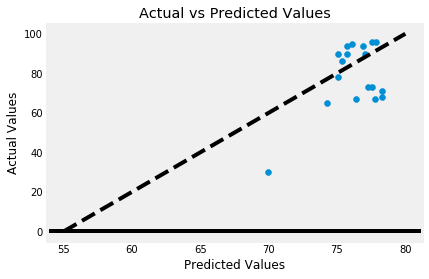

In [19]:
plt.scatter(y_pred, y_test)
plt.axhline(y=0, color='k')
plt.plot([55,80],[0,100], 'k--')
plt.grid()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual vs Predicted Values")
plt.show


In [20]:
lm2 = smf.ols('user_rating ~ Price + Owners', data=Steam_games_dumb_df)
fit2 = lm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            user_rating   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.103
Date:                Fri, 27 Apr 2018   Prob (F-statistic):              0.129
Time:                        15:20:15   Log-Likelihood:                -368.53
No. Observations:                  86   AIC:                             743.1
Df Residuals:                      83   BIC:                             750.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.8443      2.746     29.079      0.000      74.383      85.306
Price         -0.2242      0.115     -1.953      0.054      -0.452       0.004
Owners        -0.5324      1.056     -0.504      0.615      -2.632       1.568
==============================================================================
Omnibus:                        9.496   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.066
Skew:                          -0.838   Prob(JB):                      0.00652
Kurtosis:                       3.033   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

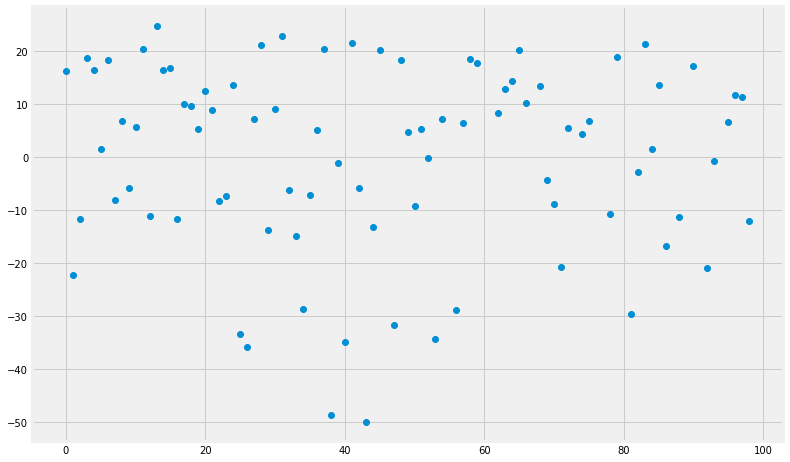

In [21]:
fit2.resid.plot(style='o', figsize=(12,8))

Text(0.5,1,'Residual Plot')

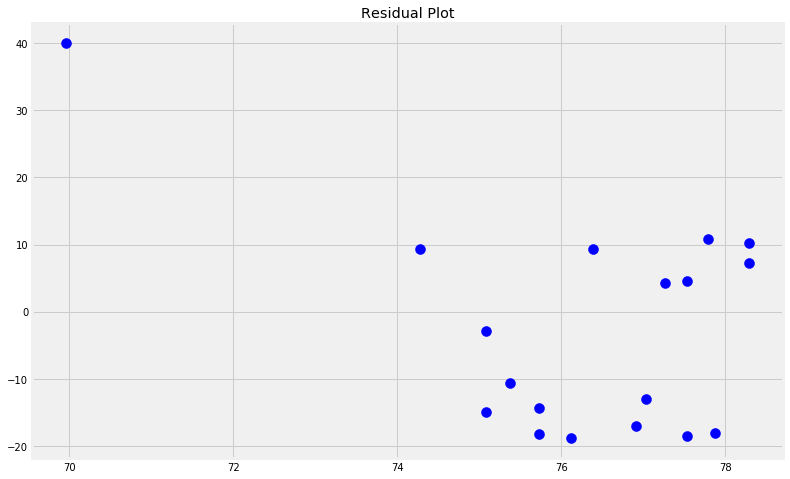

In [28]:
#Plot the residuals
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_pred - y_test, c='blue', s=100, label='(Testing Residuals)')

plt.title("Residual Plot")
#plt.ylim(-10,10)

In [22]:
# Pick a coefficient d and make the features!
def get_polynomial_features(degree, x_values):
    powers = [x_values]
    current_power = 1
    while len(powers) < degree:
        current_power = len(powers) + 1
        powers.append(x_values**current_power)
        
    X = np.concatenate(powers, axis = 1)
    return X

# example
#get_polynomial_features(3, x_values)

In [23]:
def get_polynomial_fit(degree, x_values, y_values):
    X = get_polynomial_features(degree, x_values)
    model = LinearRegression()
    model.fit(X, y_values)
    print("Score of the model is {}".format(model.score(X, y_values)))
    
    return model

def plot_polynomial_model(degree, x_values, y_values):
    model = get_polynomial_fit(degree, x_values, y_values)
    # plot points
    plt.plot(x_values, y_values, 'ro')
    
    # make the curve
    x_curve = np.arange(0,17,0.1).reshape(-1,1)
    X_curve = get_polynomial_features(degree, x_curve)
    y_curve = model.predict(X_curve)
    plt.plot(x_curve, y_curve)
    plt.ylim((0,160))
    
    

In [24]:
num_new_points = 1000
degree_to_fit = 5

# fit the model on the original data
model = get_polynomial_fit(degree_to_fit, X_train, y_train)

# get the predictions for the new data
new_X = get_polynomial_features(degree_to_fit, X_test)

print("Score on new (unseen) data points is {}".format(model.score(X_test, y_test)))

Score of the model is 0.21052921815416062


ValueError: shapes (18,2) and (10,) not aligned: 2 (dim 1) != 10 (dim 0)

In [ ]:
Poly_feat_2_fit = PolynomialFeatures(2).fit(X_train)
X_train_poly_degree2 = Poly_feat_2_fit.transform(X_train)
lr = LinearRegression()
lr_degree_2_fit= lr.fit(X_train_poly_degree2, y_train)
lr_degree2_pred_train = lr.predict(X_train_poly_degree2)
plt.scatter(y_train, lr_degree2_pred_train)
plt.plot([0, 250], [0, 250], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 2 Model on Training Data')

In [ ]:
Poly_feat_3_fit = PolynomialFeatures(3).fit(X_train)
X_train_poly_degree3 = Poly_feat_3_fit.transform(X_train)
lr = LinearRegression()
lr_degree_3_fit= lr.fit(X_train_poly_degree3, y_train)
lr_degree3_pred_train = lr.predict(X_train_poly_degree3)
plt.scatter(y_train, lr_degree3_pred_train)
plt.plot([0, 250], [0, 250], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 3 Model on Training Data')

In [ ]:
Poly_feat_4_fit = PolynomialFeatures(4).fit(X_train)
X_train_poly_degree4 = Poly_feat_4_fit.transform(X_train)
lr = LinearRegression()
lr_degree_4_fit= lr.fit(X_train_poly_degree4, y_train)
lr_degree4_pred_train = lr.predict(X_train_poly_degree4)
plt.scatter(y_train, lr_degree4_pred_train)
plt.plot([0, 250], [0, 250], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 4 Model on Training Data')

In [ ]:
Poly_feat_5_fit = PolynomialFeatures(5).fit(X_train)
X_train_poly_degree5 = Poly_feat_5_fit.transform(X_train)
lr = LinearRegression()
lr_degree_5_fit= lr.fit(X_train_poly_degree5, y_train)
lr_degree5_pred_train = lr.predict(X_train_poly_degree5)
plt.scatter(y_train, lr_degree5_pred_train)
plt.plot([0, 250], [0, 250], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 5 Model on Training Data')

In [ ]:
def f(x):
    return np.sin(2 * np.pi * x)
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)
x_plot = np.linspace(0, 1, 100)
    
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))

In [ ]:
train_error = np.empty(5)
test_error = np.empty(5)
for degree in range(5):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

plt.figure(figsize=(8,6))
plt.plot(np.arange(5), train_error, color='green', label='train')
plt.plot(np.arange(5), test_error, color='red', label='test')
#plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left');

In [ ]:
fig, ax_rows = plt.subplots(4, 2, figsize=(15, 10))

# Plot the results next to the coefficient values for each of hte 2 alphas
degree = 3
alphas = [1e-4, 1e-2, 1e-1, 1,]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Lasso(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()
